In [45]:
# Data validation


In [46]:
## Load modules
import collections
import pandas as pd
import plotly.express as px

In [47]:
## Load data
data_path = "https://raw.githubusercontent.com/MDU-PHL/emmtyper/bd5fc9f6b820cbdf78730b67738d8dba3dc4f41a/validation/emmtyper_validation.csv"
data = pd.read_csv(data_path, skiprows=1)
data.head()


,Alias,ENA-RUN,EMM-Sanger,emm-WGS,typer-blast-setting,match to sanger seq,match to PHE emm typer,Reason for mismatch to either PHE typer or sanger sequence
0,GASEMM2899,ERR1732439,1.0,1.0,1,YES,YES,NaN
1,GASEMM0549,ERR1732440,4.0,4.0,4,YES,YES,NaN
2,GASEMM2277,ERR1732441,12.0,12.0,12,YES,YES,NaN
3,GASEMM0521,ERR1732442,12.0,12.0,12,YES,YES,NaN
4,GASEMM2336,ERR1732443,6.0,6.0,6,YES,YES,NaN


In [48]:
## Data summary

data.describe()


,Alias,ENA-RUN,EMM-Sanger,emm-WGS,typer-blast-setting,match to sanger seq,match to PHE emm typer,Reason for mismatch to either PHE typer or sanger sequence
count,3047,3047,3047,3047,3043,2999,2999,165
unique,3047,3047,184,200,182,2,3,30
top,GASEMM1756,ERR1733655,1.0,1.0,1,YES,YES,Explain - different sample sanger
freq,1,1,574,574,571,2909,2963,56


In [49]:
data.columns

Index(['Alias', 'ENA-RUN', 'EMM-Sanger', 'emm-WGS', 'typer-blast-setting',
       'match to sanger seq', 'match to PHE emm typer',
       'Reason for mismatch to either PHE typer or sanger sequence'],
      dtype='object')

In [50]:
## Checking out null values

data[pd.isnull(data['match to sanger seq'])]

,Alias,ENA-RUN,EMM-Sanger,emm-WGS,typer-blast-setting,match to sanger seq,match to PHE emm typer,Reason for mismatch to either PHE typer or sanger sequence
202,GASEMM0411,ERR1732641,28.0,28.0/3.1,3.1;28.0,NaN,YES,Explain - poor genome quality
203,GASEMM2046,ERR1732642,89.0,89,89.0~,NaN,NaN,Explain - hit but not high confidence
283,GASEMM1684,ERR1732722,170.0,75,75.0~,NaN,NaN,"Explain - hit but not high confidence, differe..."
324,GASEMM0170,ERR1732763,4.0,Failed:No mapping to references,-,NaN,NaN,Explain - partial genome (59 bp)
438,GASEMM3043,ERR1732877,NT,NT,-,NaN,NaN,Explain - untypable isolate ?? Different species?
566,GASEMM0614,ERR1733005,6.0,6,-,NaN,NaN,Explain - fail
623,GASEMM2753,ERR1733062,6.99,6.99,-,NaN,NaN,Explain - fail
670,GASEMM2426,ERR1733109,5.23,5.23,-,NaN,NaN,Explain - poor genome quality
764,GASEMM1637,ERR1733203,5.23,5.23,-,NaN,NaN,Explain - Campylobacter genome
908,GASEMM0459,ERR1733347,6.0,6.0,-,NaN,NaN,Explain - fail


In [51]:
## Clean up data

data.rename(columns = {
    "match to sanger seq": "sanger_matches",
    "match to PHE emm typer": "phe_matches"
}, inplace = True)

data['sanger_matches'] = data['sanger_matches'].str.strip()
data['sanger_matches'].fillna("NO", inplace=True) 
data['phe_matches'] = data['phe_matches'].str.strip()
data['phe_matches'].fillna("NO", inplace=True)

count_sanger = collections.Counter(data['sanger_matches'])
count_phe = collections.Counter(data['phe_matches'])

pd.DataFrame.from_records(count_sanger, index=['sanger'])
summary_data = pd.concat(
    [
        pd.DataFrame(count_sanger, index=['sanger']),
        pd.DataFrame(count_phe, index=['phe'])
    ]
)

In [52]:
data_summary_long = pd.melt(summary_data.reset_index(), 
    id_vars='index', 
    value_vars=['YES', 'NO']).rename(columns = {
        'index': 'data_source',
        'value': 'number_match',
        'variable': 'count'})
print(data_summary_long)

data_source count  number_match
0      sanger   YES          2909
1         phe   YES          2964
2      sanger    NO           138
3         phe    NO            83


In [53]:
fig = px.bar(data_summary_long, x="data_source", y="number_match", color="count", barmode="group")
fig.update_xaxes(title = "Data Sources", ticktext=["Sanger", "PHE"], tickvals=['sanger', 'phe'])
fig.update_yaxes(title = "Sample Count")
fig.show()

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



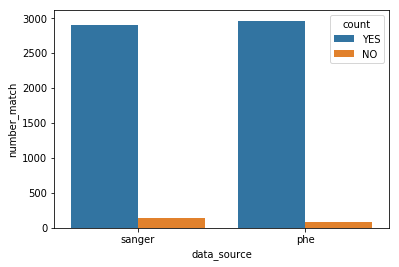

In [55]:
import seaborn as sns
sns.barplot(x="data_source", y="number_match", hue="count", data=data_summary_long)